In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

## Loading Data

In [53]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.drop(columns='ID', inplace=True)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Cleaning Data

In [54]:
df.fillna({'Arrival Delay': df['Arrival Delay'].mean()}, inplace=True)

## Charts

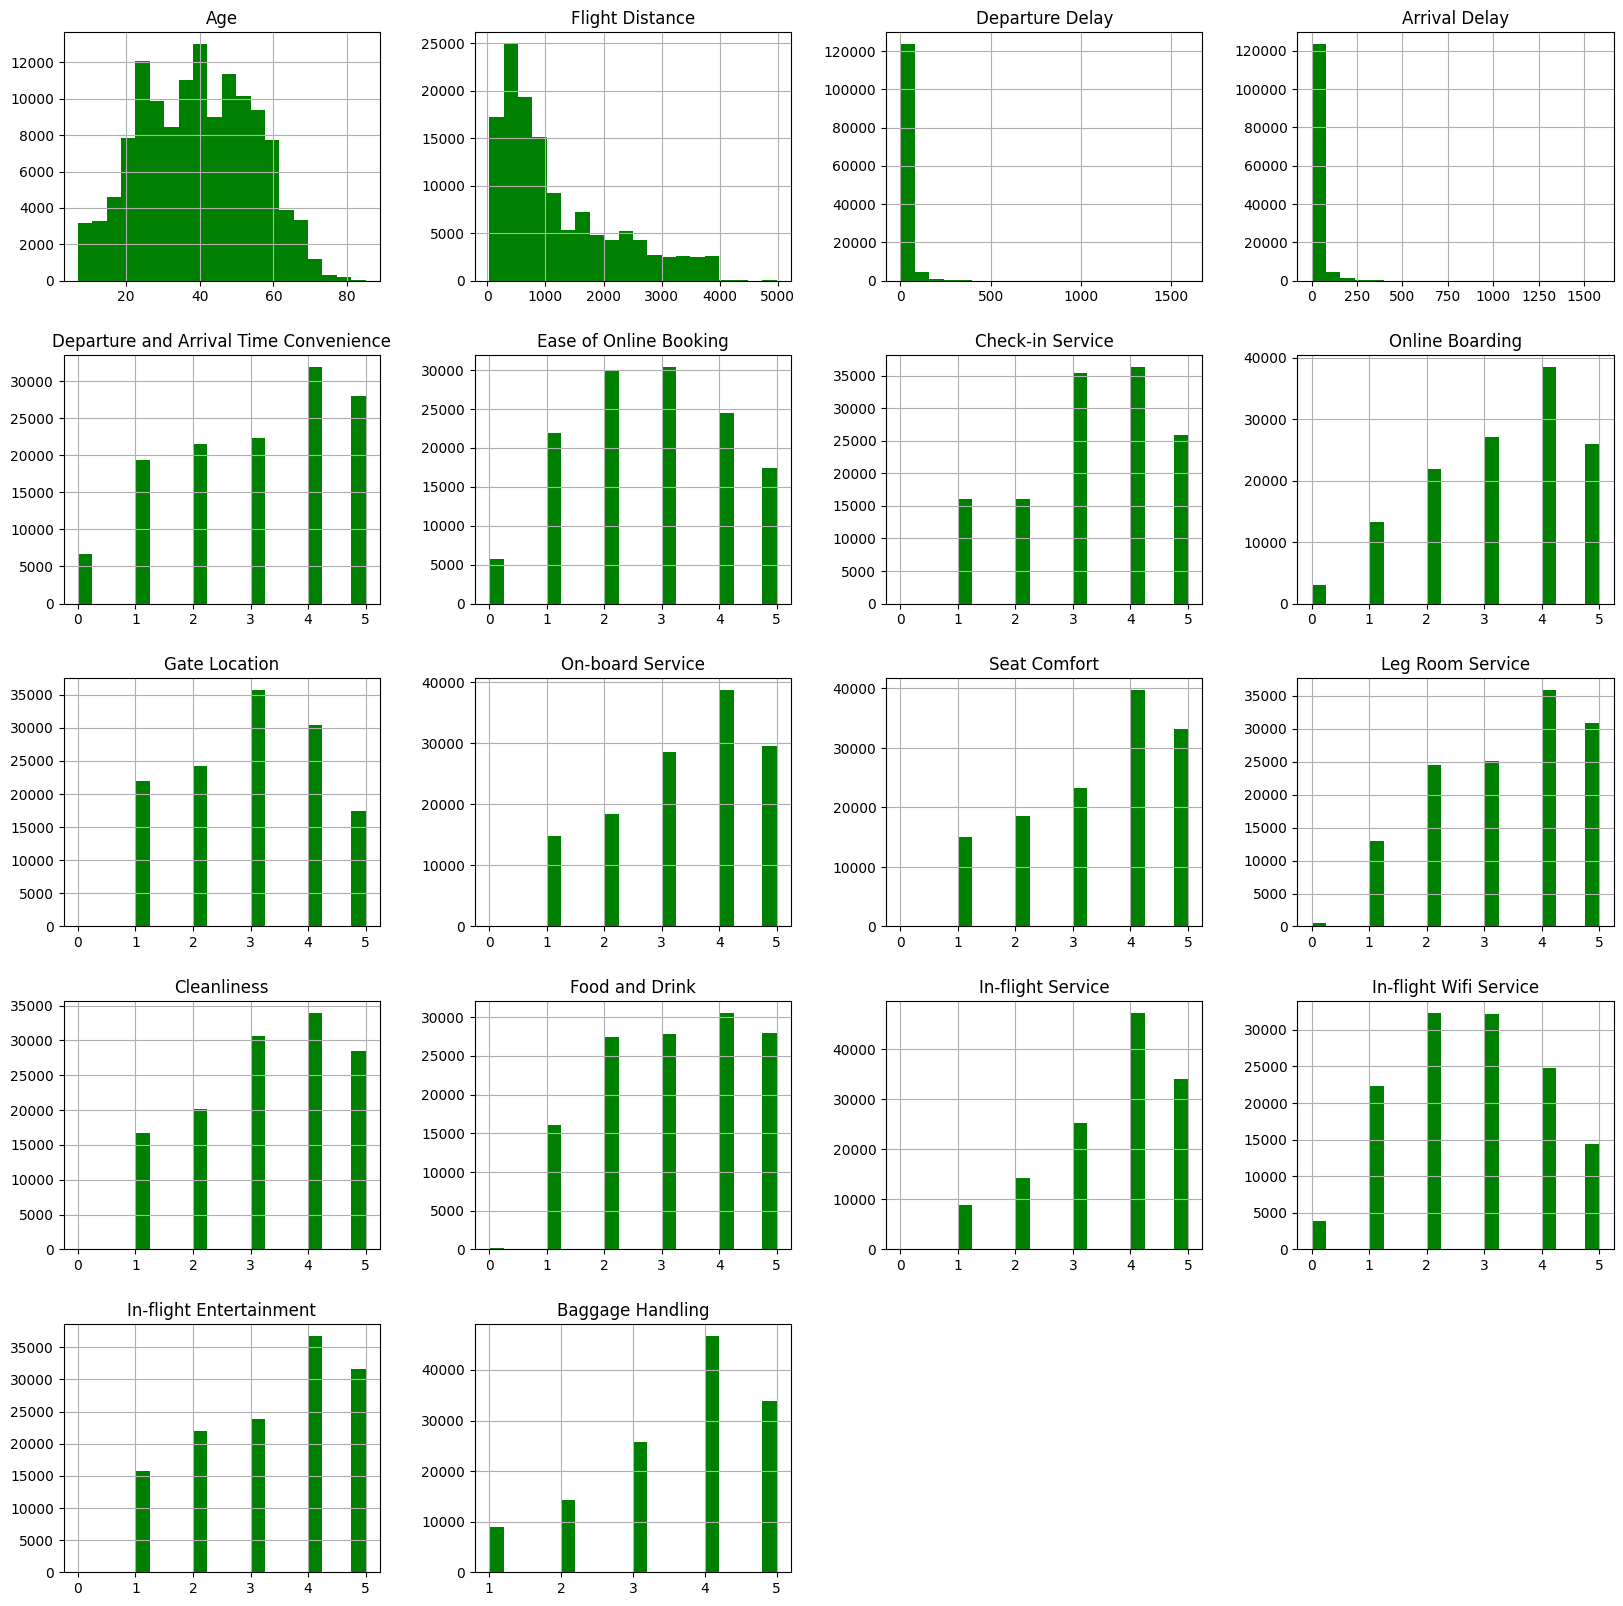

In [55]:
df.hist(bins=20, figsize=(20,20), color='green')
plt.show()

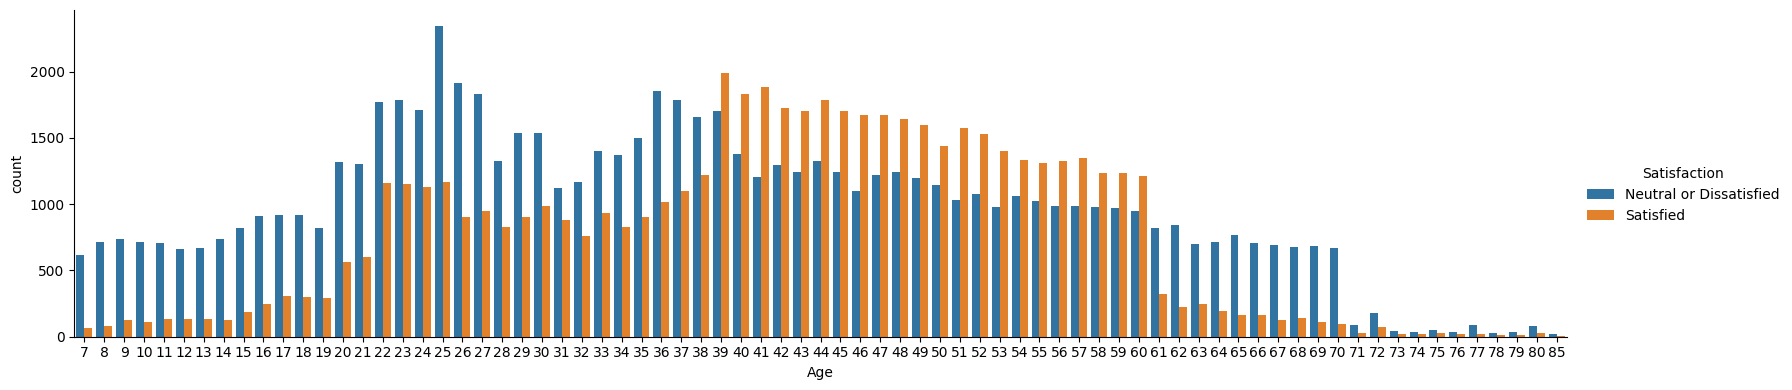

In [129]:
sns.catplot(data=df, x='Age', height=4, aspect=4, kind='count', hue='Satisfaction')
plt.show()

## Encoding

In [56]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

In [57]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [58]:
df['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [59]:
df['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [60]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [61]:
label_encoder = LabelEncoder()
columns = df.select_dtypes(include='object').drop(columns='Satisfaction').columns
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

## Model

In [62]:
X, y = df.drop(columns='Satisfaction'), df['Satisfaction']

### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = model.predict(X_test)

In [66]:
model_score = accuracy_score(y_test, y_pred)
model_score

0.9437942716353557

### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
model_score

0.9620418848167539

### KNeighbors

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
model_score

0.7487680936248845

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
model_score

0.8724206960271019

## Prediction without Voting from passengers columns

In [122]:
X, y = df.iloc[:,:8], df['Satisfaction']
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7637049584231599

## TEST DATA

In [123]:
X.iloc[:0].to_dict()

{'Gender': {},
 'Age': {},
 'Customer Type': {},
 'Type of Travel': {},
 'Class': {},
 'Flight Distance': {},
 'Departure Delay': {},
 'Arrival Delay': {}}

In [124]:
test_inputs = {
 'Gender': [0],
 'Age': [20],
 'Customer Type': [1],
 'Type of Travel': [0],
 'Class': [1],
 'Flight Distance': [1200],
 'Departure Delay': [0],
 'Arrival Delay': [0]
}
test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,0,20,1,0,1,1200,0,0


In [125]:
model.predict(test_df)

array(['Satisfied'], dtype=object)

## Saving and Loading Prediction Model

In [121]:
import joblib

In [126]:
joblib.dump(model, 'Airline_Passenger_Satisfaction.joblib')

['Airline_Passenger_Satisfaction.joblib']

In [127]:
trained_model = joblib.load('Airline_Passenger_Satisfaction.joblib')
trained_model.predict(test_df)

array(['Satisfied'], dtype=object)